Tema 2: A1 YOU DO Tema2_Pandas
------------------------------

1. Importar data inicial
-------------------

In [3]:
## Importar archivos
from google.cloud import storage
from io import StringIO
import pandas as pd
#client = storage.Client()

client = storage.Client.from_service_account_json('healthy-display-272415-e6f36368f2ef.json')

bucket_name = 'python-files-datahack'
bucket = client.get_bucket(bucket_name)
folder='data/retail-data/by-day/'
files=bucket.list_blobs(prefix=folder)
#Listamos el nombre de todos los archivos

#Listamos el nombre de todos los archivos
fileList=[file.name for file in files if '.' in file.name]

In [4]:
#Importar archivos a pandas
total_lista=len(fileList)
ventas=pd.read_csv('gs://python-files-datahack/'+fileList[0])
for i in range(1,total_lista):
    archivo='gs://python-files-datahack/'+fileList[i]
    data_temp=pd.read_csv(archivo)
    ventas = pd.concat([ventas, data_temp], ignore_index=True)

In [5]:
#Comprobar
ventas.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom

2. Generar un archivo parquet en GCS que indique el total de ventas por pais del mes de diciembre 2012
_____________

In [8]:
#Ventas del 2011-12 por pais
df_201112=ventas[ventas.InvoiceDate.between("2011-12-01 00:00:00", "2011-12-31 23:59:59", inclusive=True)]
vta_dic2011=df_201112.groupby(["Country"])["UnitPrice"].agg([sum])
vta_dic2011.head()

sum
Country                
Austria           64.58
Belgium          274.04
Channel Islands   24.85
Cyprus            69.35
Denmark           35.20

In [9]:
#Guardar en parquet
vta_dic2011.to_parquet("gs://bucket_python_edgarchavc/data/vta_dic2011_echavez.parquet", engine="pyarrow")

3. Generar un grafico que muestra los diez articulosmas vendidos en el mes
------

In [12]:
#Se ordena la data:
import matplotlib.pyplot as plt
srt_vta201112=vta_dic2011.sort_values("sum", ascending=False)
srt_vta201112.head(10)

sum
Country                  
United Kingdom  128259.67
Germany           1411.37
EIRE              1215.05
France            1127.25
Portugal           349.05
Belgium            274.04
Norway             218.43
Netherlands        201.39
Greece             163.36
Finland            153.85

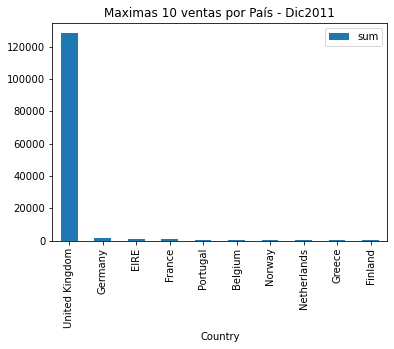

In [13]:
#los top 10 se muestran en grafico
vta201112_top10=srt_vta201112.head(10)
vta201112_top10.plot(kind= "bar",title="Maximas 10 ventas por País - Dic2011")
plt.show()

4. elaborar un archivo csv de cantidad de unidades de producto vendidas por dia indicando en una nueva columna si supera las 100 unidades vendidas como Trending caso contrario Not Trending
-------

In [16]:
#Se genera la información solicitada
df_201112_trending=df_201112.groupby(["InvoiceDate"])["Quantity"].agg([sum])
df_201112_trending["Valida_trending"] = df_201112_trending["sum"].apply(lambda x: "Trending" if x > 100 else "Not Trending")
df_201112_trending

sum Valida_trending
InvoiceDate                             
2011-12-01 08:12:00   -8    Not Trending
2011-12-01 08:14:00   -4    Not Trending
2011-12-01 08:18:00   -7    Not Trending
2011-12-01 08:23:00   -4    Not Trending
2011-12-01 08:25:00   -2    Not Trending
...                  ...             ...
2011-12-09 12:23:00   76    Not Trending
2011-12-09 12:25:00  120        Trending
2011-12-09 12:31:00  278        Trending
2011-12-09 12:49:00   66    Not Trending
2011-12-09 12:50:00  105        Trending

[899 rows x 2 columns]

In [17]:
#Guarda archivo en csv
df_201112_trending.to_csv("gs://bucket_python_edgarchavc/data/df_201112_trending_echavez.csv")

5. Implementar la clase producto, que tenga como variables: precio, descripcion
---------

In [22]:
#lista
df_201112.sort_values("Quantity", ascending=False).head()

InvoiceNo StockCode                      Description  Quantity  \
540421    581483     23843      PAPER CRAFT , LITTLE BIRDIE     80995   
540070    581458     22197                   POPCORN HOLDER      1500   
521375    580363     23582     VINTAGE DOILY JUMBO BAG RED       1500   
534952    581175     23084               RABBIT NIGHT LIGHT      1440   
533812    581115     22413  METAL SIGN TAKE IT OR LEAVE IT       1404   

                InvoiceDate  UnitPrice  CustomerID         Country  
540421  2011-12-09 09:15:00       2.08     16446.0  United Kingdom  
540070  2011-12-08 18:45:00       0.72     17949.0  United Kingdom  
521375  2011-12-02 16:32:00       1.79     13868.0  United Kingdom  
534952  2011-12-07 15:16:00       1.79     14646.0     Netherlands  
533812  2011-12-07 12:20:00       2.75     15195.0  United Kingdom

In [33]:
#Clase producto
class producto:
  def __init__(self, d,p):
    self.precio = float(p)
    self.descripcion = d
 
  def convertir_soles(self,tc):
        precio_s = round(float(tc)*self.precio,2)
        print(f"Producto {self.descripcion} vale {precio_s} soles")

In [34]:
# pruebas
producto1=producto("PAPER CRAFT , LITTLE BIRDIE",2.08)
producto1.convertir_soles(3.4)

producto2=producto("POPCORN HOLDER",0.72)
producto2.convertir_soles(3.41)

producto3=producto("VINTAGE DOILY JUMBO BAG RED",0.82)
producto3.convertir_soles(3.41)

Producto PAPER CRAFT , LITTLE BIRDIE vale 7.07 soles
Producto POPCORN HOLDER vale 2.46 soles
Producto VINTAGE DOILY JUMBO BAG RED vale 2.8 soles


6. Copiar la base de datos de SQlite y crear una nueva tabla llamada 'producto' e insertar 3 valores
---------------------------------

In [26]:
!gsutil cp "gs://python-files-datahack/data/flight-data/jdbc/my-sqlite.db" .

Copying gs://python-files-datahack/data/flight-data/jdbc/my-sqlite.db...
/ [1 files][ 11.0 KiB/ 11.0 KiB]                                                
Operation completed over 1 objects/11.0 KiB.                                     


In [30]:
#conexion a bd
from sqlalchemy import create_engine
engine = create_engine('sqlite:///my-sqlite.db', echo=False)
connection = engine.connect()

In [28]:
from sqlalchemy import MetaData, Table
metadata = MetaData()

In [37]:
#Crear tabla producto
from sqlalchemy import (Table, Column, String, Integer, Boolean)
from sqlalchemy import MetaData
metadata = MetaData()
tab = Table('producto', metadata,
               Column('id', Integer()),
               Column('descripcion', String(255)),
               Column('precio', Integer())
           )
metadata.create_all(engine)
engine.table_names()

['flight_info', 'producto']

In [38]:
productos = Table('producto', metadata, autoload=True,
autoload_with=engine)
print(repr(productos))

Table('producto', MetaData(bind=None), Column('id', Integer(), table=<producto>), Column('descripcion', String(length=255), table=<producto>), Column('precio', Integer(), table=<producto>), schema=None)


In [39]:
print(productos.columns.keys())

['id', 'descripcion', 'precio']


In [40]:
#Insertar data
from sqlalchemy import insert
stmt = insert(productos)
valores = [
        {'id': 1, 'descripcion': 'LG SMART TV UHD 49'' 49UM7100', 'precio': 1499},
        {'id': 2, 'descripcion': 'PHILIPS SMART TV 43PFD5813+ RACK PARA TV', 'precio': 1049},
        {'id': 3, 'descripcion': 'AOC SMART TV FHD 43" 43S5295', 'precio': 899}
]
result_proxy = connection.execute(stmt, valores)
print(result_proxy.rowcount)

3


In [43]:
#consulta de tabla
stmt = 'SELECT * FROM producto'
result_proxy = connection.execute(stmt)
results = result_proxy.fetchall()
first_3 = results[3]
print(first_3)

IndexError: list index out of range